# Linear Regression

Put all things together.

In [2]:
import torch
import torch.nn as nn
import numpy as np

from sklearn import datasets
import matplotlib.pyplot as plt


# Prepare data

In [7]:
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))

y = y.view(y.shape[0], 1)

n_samples, n_features = X.shape

# Model

In [8]:
input_size = n_features
output_size = 1

model = nn.Linear(input_size, output_size)

epoch 0, loss=342.3495
epoch 10, loss=339.7231
epoch 20, loss=337.8028
epoch 30, loss=336.3984
epoch 40, loss=335.3711
epoch 50, loss=334.6195
epoch 60, loss=334.0696
epoch 70, loss=333.6673
epoch 80, loss=333.3727
epoch 90, loss=333.1571


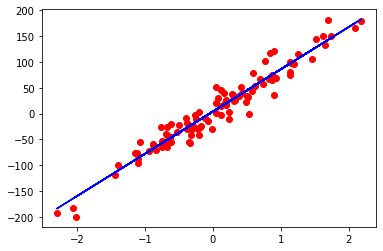

In [12]:
learning_rate = 0.01

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

num_epoch = 100

for epoch in range(num_epoch):
  y_predicted = model(X)
  loss = criterion(y_predicted, y)

  loss.backward()

  optimizer.step()

  optimizer.zero_grad()

  if epoch % 10 == 0:
    print(f"epoch {epoch}, loss={loss.item():.4f}")

# plot
predicted = model(X).detach().numpy()

plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()

